<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/large_bank_mortgage_originations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Libraries**

In [2]:
!pip install fredapi

### **Import Libraries**

In [3]:
import os
from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **FRED API**

In [5]:
fred = Fred(api_key=userdata.get('FRED'))

### **Get Data**

In [10]:
data_series = fred.get_series('RCMFLOORIG')
df = data_series.to_frame(name='Rate')
df.index.name = 'Date'
#df = df.loc['2018-01-01':'2025-12-31']
df.head()

Rate
Date              
2012-07-01  181.21
2012-10-01  177.61
2013-01-01  185.22
2013-04-01  179.73
2013-07-01  154.44

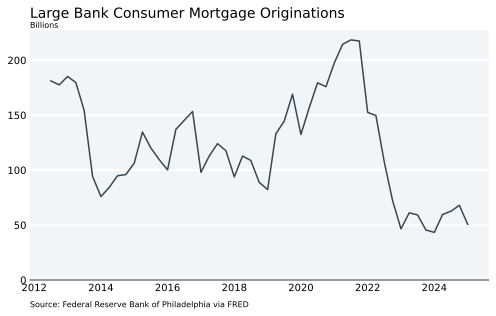

In [13]:
fig = plt.figure(dpi=300, tight_layout=True, figsize=(7, 4.5))
ax = plt.axes(facecolor=(.95, .96, .97))
ax.xaxis.set_tick_params(length=0, labeltop=False, labelbottom=True)

for key in 'left', 'right', 'top':
    ax.spines[key].set_visible(False)
ax.text(0., 1.05, s='Large Bank Consumer Mortgage Originations', transform=ax.transAxes, size=14)
ax.text(0., 1.01, s='Billions', transform=ax.transAxes, size=8)
plt.plot(df.index, df.Rate, color='#36454F')
ax.yaxis.set_tick_params(length=0)
ax.yaxis.grid(True, color='white', linewidth=2)
ax.set_axisbelow(True)
ax.annotate("Source: Federal Reserve Bank of Philadelphia via FRED",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)
plt.ylim(ymin=0)
fig.savefig('./large_bank_mortgage_orginations.png')
plt.show()